In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [9]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets=1, noise = 20)

[59.17496154]
-0.34254472126656843


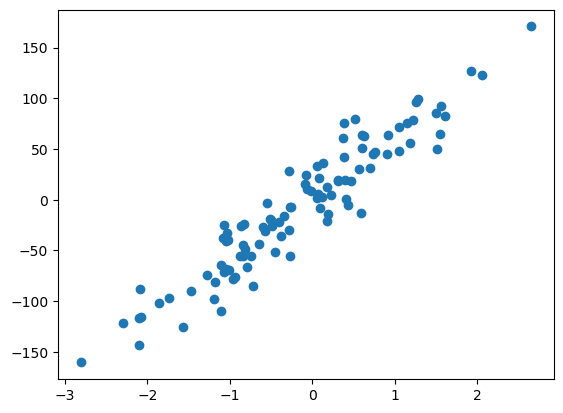

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\mahak\AppData\Local\Temp\ipykernel_9524\965887373.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
C:\Users\mahak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mahak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e+04, tolerance: 3.211e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


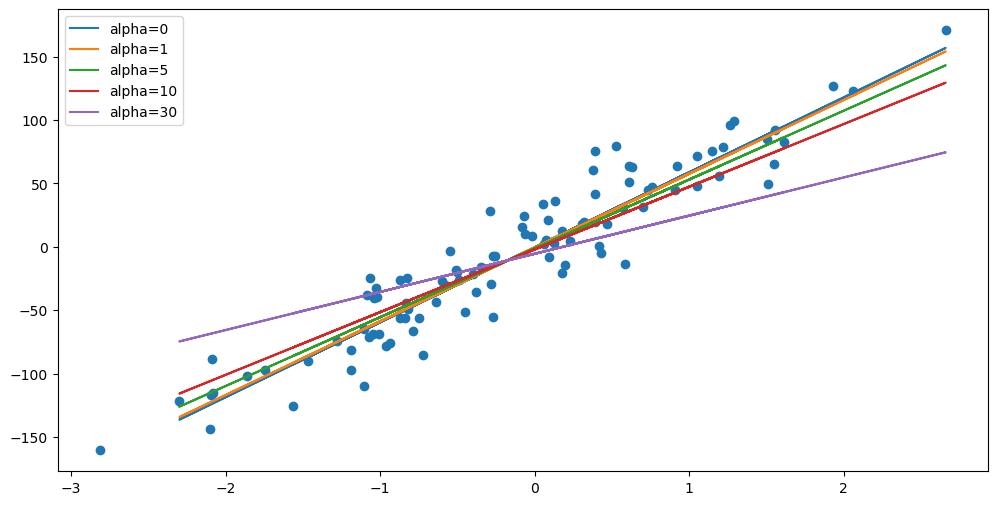

In [13]:
alpha = [0,1,5,10,30]
plt.figure(figsize = (12,6))
plt.scatter(X,y)

for i in alpha:
    L = Lasso(alpha = i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test), label = 'alpha={}'.format(i))
plt.legend()
plt.show()

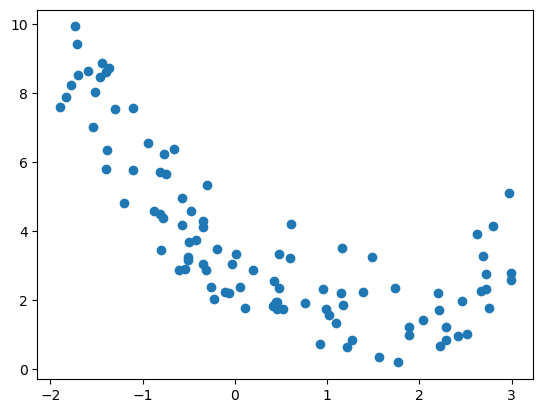

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\mahak\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mahak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mahak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.029e+01, tolerance: 5.847e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

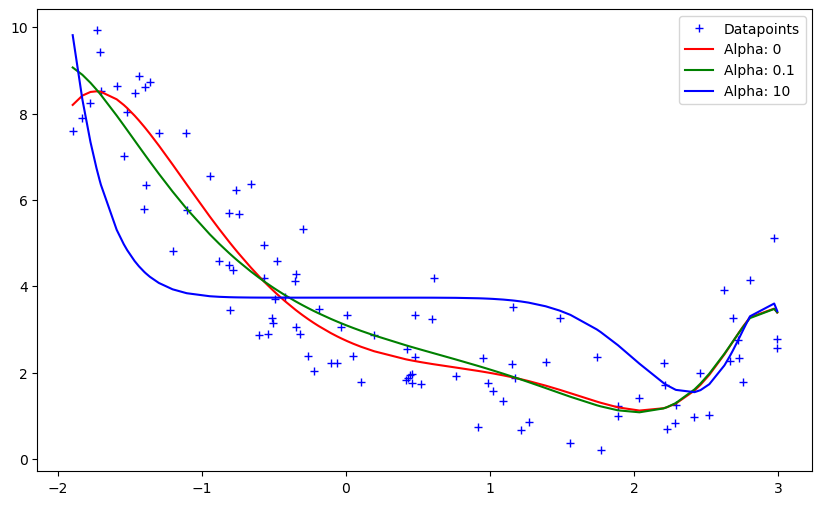

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_lasso_pred(x1,x2,alpha):
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree = 16)),
        ('Lasso', Lasso(alpha = alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0,0.1,10]
cs = ['r','g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2,'b+', label = 'Datapoints')

for alpha , c in zip(alphas, cs):
    pred = get_lasso_pred(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]), pred[np.argsort(x1[:,0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [24]:
np.argsort(x1[:, 0])

array([20, 68, 86, 94, 99, 44, 62, 19, 85, 95,  6,  5, 15, 56, 75, 48, 82,
       63, 13, 72, 12, 53, 66,  8, 84, 36, 60, 39, 96, 76, 78, 65, 28, 35,
       10,  0, 26, 93, 17, 73, 30, 45, 61, 52, 27, 23, 41,  9, 40, 32, 83,
       54, 89, 25, 97, 34, 14, 58,  3, 22, 57,  1, 74, 51,  7, 21,  4, 70,
       79, 88, 50, 67, 77, 37, 59, 24, 64, 18, 38, 80, 33, 69, 11, 46, 71,
       98, 16, 87,  2, 91, 31, 55, 43, 90, 81, 49, 92, 42, 29, 47],
      dtype=int64)

In [25]:
x1[:, 0]

array([-0.48070857,  0.59318985,  2.45931782,  0.47828137,  0.98628382,
       -1.4011181 , -1.43731839,  0.91881872, -0.80450557, -0.03182085,
       -0.49336389,  2.20306588, -0.87952915, -1.103372  ,  0.45759016,
       -1.39291235,  2.28951227, -0.34883097,  1.73938195, -1.54226109,
       -1.89654387,  0.95071181,  0.47854985, -0.10514463,  1.48243669,
        0.42406903, -0.42688292, -0.18963064, -0.51393452,  2.99099746,
       -0.31751351,  2.62547584,  0.04988141,  1.88767427,  0.44546771,
       -0.50530747, -0.76483684,  1.26658485,  1.7669784 , -0.66232643,
        0.00757119, -0.06129876,  2.97069416,  2.68375013, -1.70094556,
       -0.30100592,  2.21259515,  2.99185343, -1.29889237,  2.75354159,
        1.15743414,  0.76156915, -0.22412479, -0.81275983,  0.19555183,
        2.66404816, -1.38921961,  0.52218355,  0.4602988 ,  1.38562426,
       -0.74603492, -0.26069451, -1.59134181, -1.10802994,  1.55721787,
       -0.53875192, -0.81175669,  1.16998958, -1.82946186,  2.03